In [1]:
using DataFrames
using StatsBase
using StatsPlots
using Random

default(label=false);

# 10.1 Maximum entropy

Code 10.1

In [2]:
p = DataFrame(
    :A => [0, 0, 10, 0, 0],
    :B => [0, 1, 8, 1, 0],
    :C => [0, 2, 6, 2, 0],
    :D => [1, 2, 4, 2, 1],
    :E => [2, 2, 2, 2, 2],
)

,A,B,C,D,E
,Int64,Int64,Int64,Int64,Int64
1,0,0,0,1,2
2,0,1,2,2,2
3,10,8,6,4,2
4,0,1,2,2,2
5,0,0,0,1,2


Code 10.2

In [3]:
p_norm = mapcols(c -> c ./ sum(c), p)

,A,B,C,D,E
,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.1,0.2
2,0.0,0.1,0.2,0.2,0.2
3,1.0,0.8,0.6,0.4,0.2
4,0.0,0.1,0.2,0.2,0.2
5,0.0,0.0,0.0,0.1,0.2


Code 10.3

In [4]:
ent_vals = mapcols(entropy, p_norm)

,A,B,C,D,E
,Float64,Float64,Float64,Float64,Float64
1,-0.0,0.639032,0.950271,1.47081,1.60944


Code 10.4

In [5]:
ways = [1, 90, 1260, 37800, 113400]
logwayspp = log.(ways)/10

5-element Vector{Float64}:
 0.0
 0.4499809670330265
 0.7138866999945523
 1.0540064381607679
 1.163867667027579

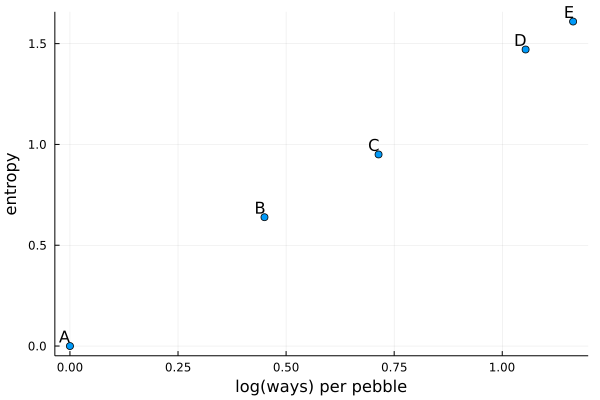

In [6]:
txt = text.(names(ent_vals), :bottom, :right, 11)
scatter(logwayspp, collect(ent_vals[1,:]), txt=txt, xlab="log(ways) per pebble", ylab="entropy")